

# Investigate a Dataset : no show appointments-kagglev2-may-2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ●This dataset collects information from 100k medical appointments in Brazil
> 
> ●and is focused on the question of whether or not patients show up for their appointment.
> 
> ●A number of characteristics about the patient are included in each row.
> 
> ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
> 
> ● ‘Neighborhood’ indicates the location of the hospital.
> 
> ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> 
> ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. We will address that in the next steps so as not to get confused


In [13]:
# we will Use this cell to set up import statements for all of the packages that we plan to use.
# We will include a 'magic word' so that the visualizations are plotted inline with the notebook.

import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Questions

attendance ratio

which features affect in attendance

<a id='wrangling'></a>
## Data Wrangling

> In this part, we are going to view the data

### General Properties

In [14]:
# Load data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

df = pd.read_csv('C:\\Users\gdabu\\noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no Missing Data

In [16]:
# Finding duplicate data
df.duplicated().sum()

0

There is no duplicate Data

In [17]:
# Data summarize
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is a wrong age as it cannot be less than zero

In [18]:
# Finding wrong age
wrong_age = df.query('Age == -1')
wrong_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [19]:
# Finding unique values for patients
df['PatientId'].nunique()

62299

In [20]:
# Duplicate attendance status for patients
print(df.duplicated(['PatientId', 'No-show']).sum())

38710


<!-- Changing the Name of 'No-show' Column to 'attended' -->
<!-- Replacing 'No' Value to 1 and 'Yes' to 0 -->
<!-- Converting Column dtype to numeric -->

<a id='wrangling'></a>
## Data Cleaning

> In this part, we are going to clean and trim the data


In [21]:
# Deleting wrong age
df.drop(index = 99832 , inplace = True)

In [22]:
# Deleting Duplicate attendance status for patients
df.drop_duplicates(['PatientId', 'No-show'] , inplace = True)

In [23]:
# Deleting unimportant columns
df.drop(['PatientId', 'ScheduledDay','AppointmentDay','AppointmentID'] , axis = 1, inplace = True)

In [24]:
# New Data dimensions
df.shape

(71816, 10)

In [25]:
# Fixing columns name
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'attended'}, inplace = True)
# # Edit column "attended" values to be clear
df['attended'] = df['attended'].apply(lambda x : x.replace('No','1'))
df['attended'] = df['attended'].apply(lambda x : x.replace('Yes','0'))
df['attended'] = df['attended'].apply(lambda x : x.replace('1','Yes'))
df['attended'] = df['attended'].apply(lambda x : x.replace('0','No'))

In [26]:
# New Data
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,attended
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [27]:
# New Data describtion
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The data is now ready to explore

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimed and cleaned the data, we move on to exploration. Calculate statistics and create visualizations address the questions we asked in the Introduction section.
> 
> 


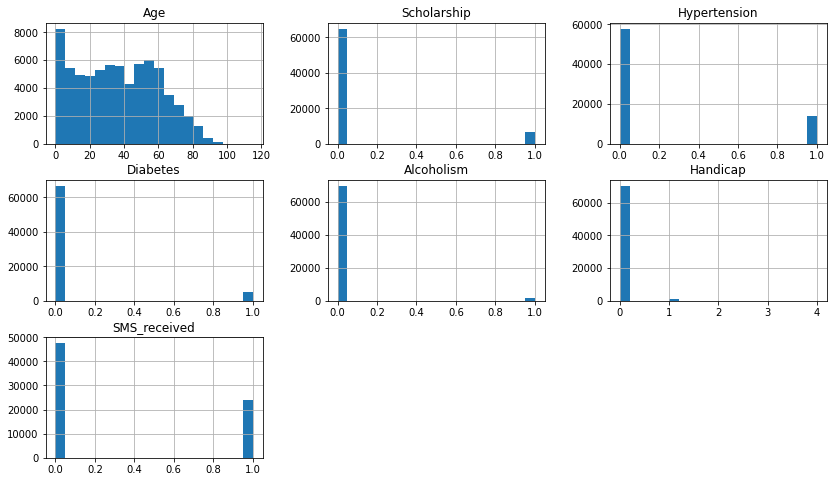

In [28]:
df.hist(figsize=(14,8) , bins = 20);

### Research Question 1  (Attendance rate)

In [29]:
attended = df.attended == 'Yes'
not_attended = df.attended == 'No'
pd.DataFrame([df[attended].count() , df[not_attended].count()] , index=['attended' , 'not_attended'])

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,attended
attended,54153,54153,54153,54153,54153,54153,54153,54153,54153,54153
not_attended,17663,17663,17663,17663,17663,17663,17663,17663,17663,17663


In [30]:
pd.DataFrame([df[attended].mean() , df[not_attended].mean()] , index=['attended' , 'not_attended'])

C:\Users\gdabu\AppData\Local\Temp/ipykernel_10268/3294950835.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame([df[attended].mean() , df[not_attended].mean()] , index=['attended' , 'not_attended'])


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
attended,37.229166,0.091334,0.202944,0.072868,0.02360,0.020904,0.297232
not_attended,34.376267,0.108419,0.170922,0.065108,0.02944,0.017777,0.453094


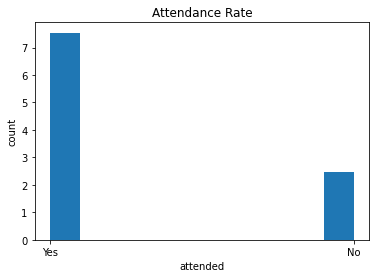

In [45]:
plt.hist( df['attended'] ,density = 1) 
plt.xlabel('attended')
plt.ylabel('count')
plt.title('Attendance Rate')
plt.show()

* It turns out that the attendance rate is high
* Let's explore what are the features affecting attendance rate

In [48]:
# Creating Function to measure the impact of features on attendance
def Eff_on_Attend (column):
    df[column][attended].hist(alpha=0.6, bins=20, color='red', label= 'attended' , figsize = (14,8))
    df[column][not_attended].hist(alpha=0.6, bins=20, color='blue', label= 'not_attended' , figsize = (14,6))
    plt.xlabel(f"{column}", fontsize = 18)
    plt.ylabel('count of patient' , fontsize = 18)
    plt.title("{} Affection in attendance  rate".format(column))
    plt.legend(); 

After Creating this Function, We don't have to repeat this code again whenever we need it

### Research Question 2  (Gender Affection in attendance rate)

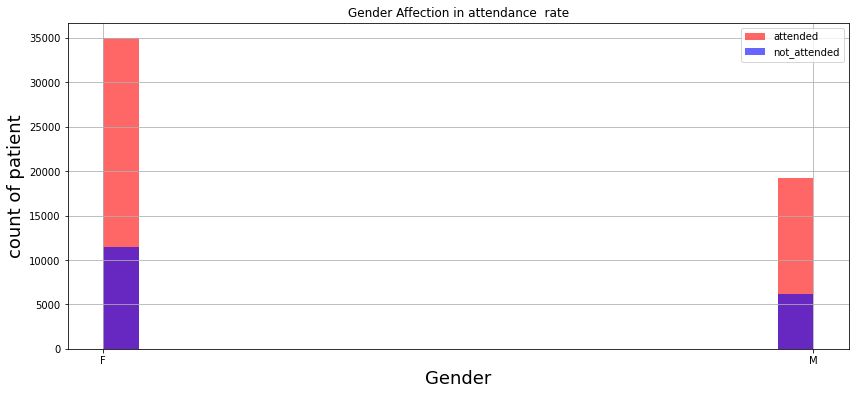

In [49]:
Eff_on_Attend('Gender')

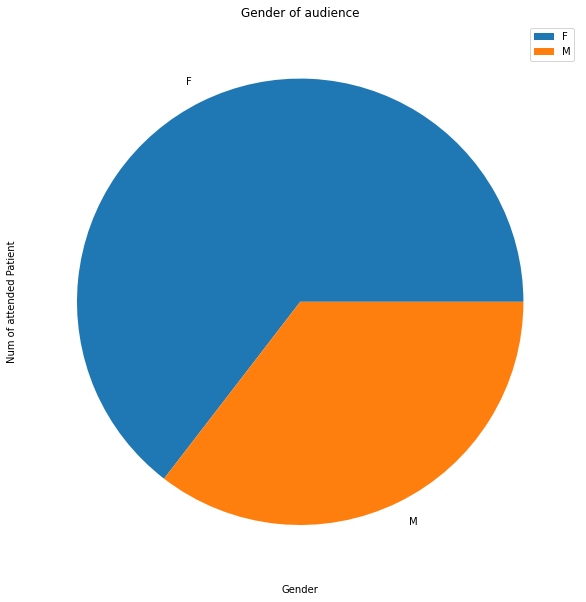

In [55]:
# How many female and male patients attended?
df['Gender'][attended].value_counts().plot(kind='pie' , figsize = (10,15))
plt.ylabel("Num of attended Patient")
plt.xlabel("Gender")
plt.title("Gender of audience")
plt.legend();

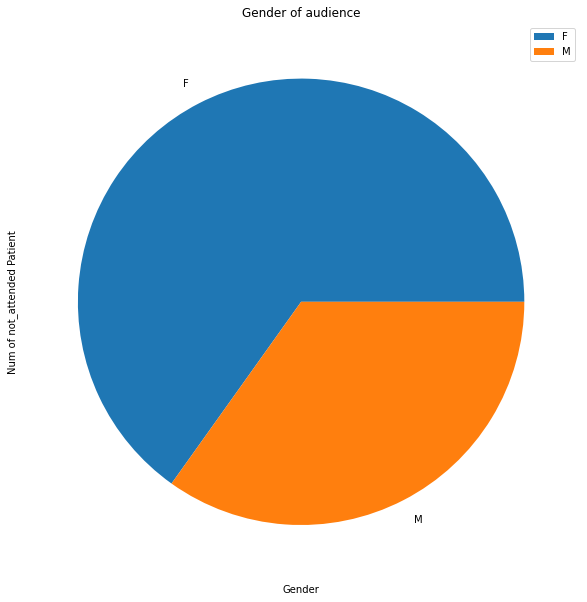

In [57]:
# How many female and male patients not_attended?
df['Gender'][not_attended].value_counts().plot(kind='pie' , figsize = (10,15))
plt.ylabel("Num of not_attended Patient")
plt.xlabel("Gender")
plt.title("Gender of audience")
plt.legend();

Gender has no obvious effect on attendance rate

### Research Question 3  (age Effection in attendance  rate)

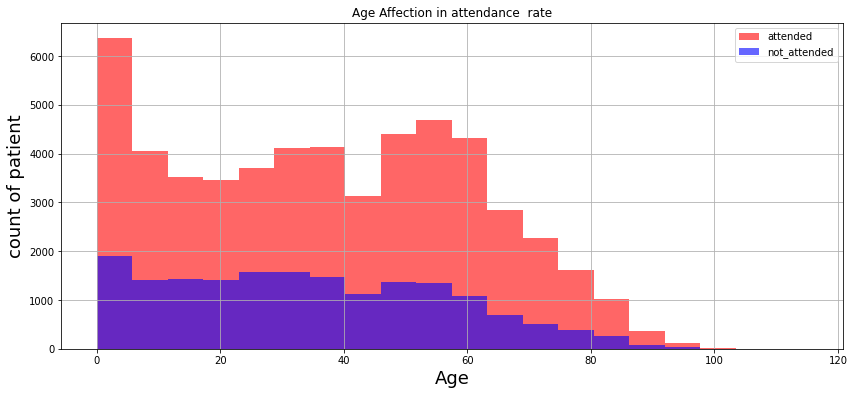

In [50]:
Eff_on_Attend('Age')

At a young age, the interest in attendance increased

### Research Question 4  (Gender & Age Effection in attendance rate)

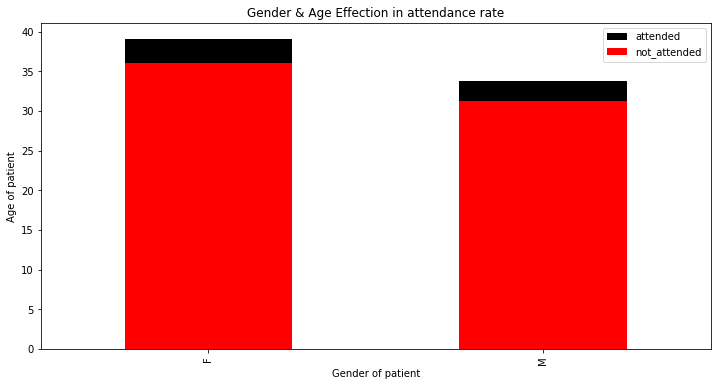

In [52]:
df[attended].groupby(['Gender']).Age.mean().plot(kind='bar', color='black', label= 'attended', figsize = (12,6))
df[not_attended].groupby(['Gender']).Age.mean().plot(kind='bar', color='red', label= 'not_attended', figsize = (12,6))
plt.xlabel('Gender of patient')
plt.ylabel('Age of patient')
plt.title('Gender & Age Effection in attendance rate')
plt.legend();

There is no Effection

### Research Question 5  (Neighbourhood Effection in attendance  rate)

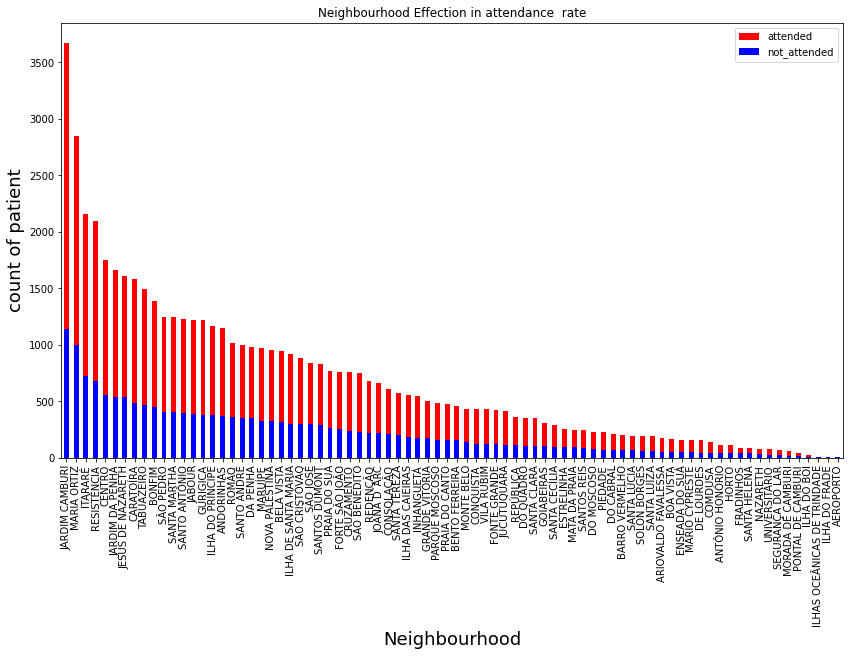

In [51]:
df['Neighbourhood'][attended].value_counts().plot(kind = 'bar' ,color='red', label= 'attended' , figsize = (14,8))
df['Neighbourhood'][not_attended].value_counts().plot(kind = 'bar' ,color='blue', label= 'not_attended' , figsize = (14,8))
plt.xlabel('Neighbourhood', fontsize = 18)
plt.ylabel('count of patient' , fontsize = 18)
plt.title('Neighbourhood Effection in attendance  rate')
plt.legend();

It is clear that the patient's place of residence reflects positively and negatively on his response to attendance

### Research Question 6  (Scholarship Effection in attendance rate)

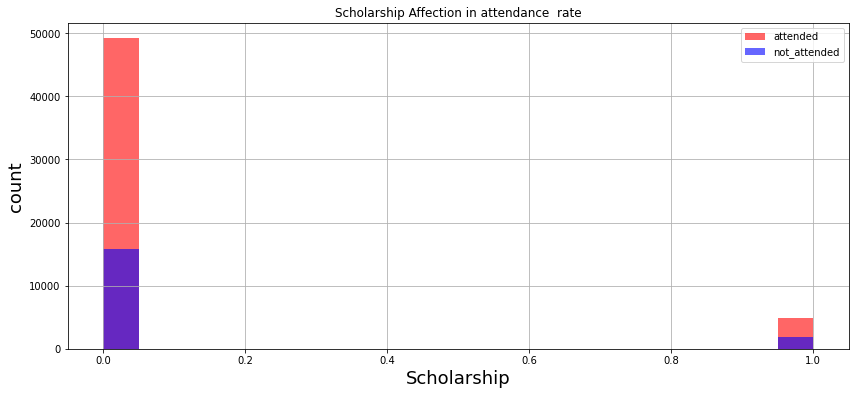

In [38]:
Eff_on_Attend('Scholarship')

Scholarship has no effect on attendance rate

### Research Question 7  (Hypertension &  Diabetes & Age  affection in attendance  rate)

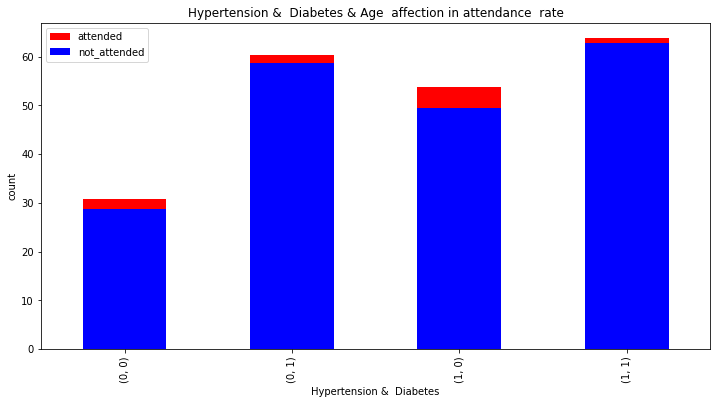

In [40]:
df[attended].groupby(['Diabetes','Hypertension']).mean()['Age'].plot(kind='bar', color='red', label= 'attended', figsize = (12,6))
df[not_attended].groupby(['Diabetes','Hypertension']).mean()['Age'].plot(kind='bar', color='blue', label= 'not_attended', figsize = (12,6))
plt.xlabel('Hypertension &  Diabetes')
plt.ylabel('count of patient')
plt.title('Hypertension &  Diabetes & Age  affection in attendance  rate')
plt.legend();

These chronic diseases do not have a clear effect on attendance rate

### Research Question 8  (Alcoholism Effection in attendance rate)

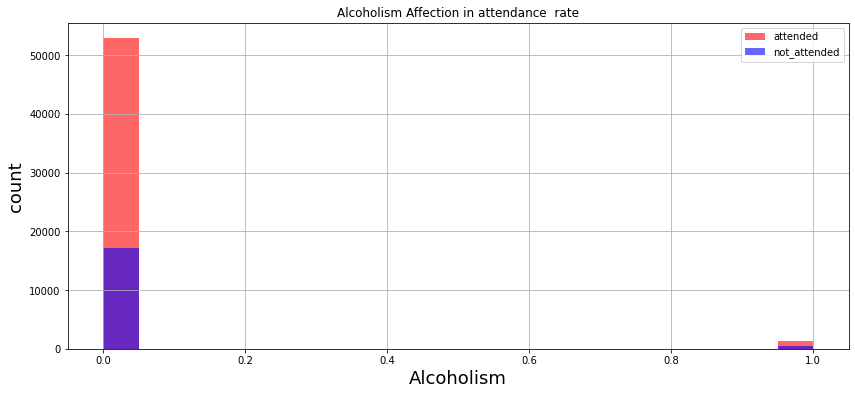

In [41]:
Eff_on_Attend('Alcoholism')

Alcoholism has no clear effect on attendance rate

### Research Question 9  (SMS_received Effection in attendance rate)

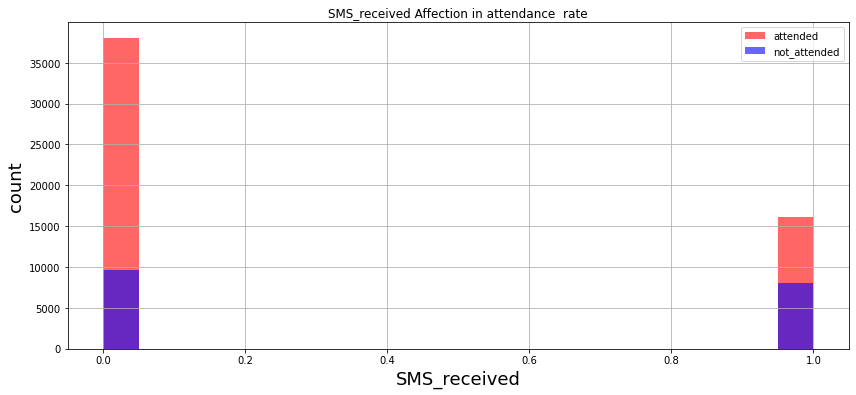

In [42]:
Eff_on_Attend('SMS_received')

SMS_received has no clear effect on attendance rate

<a id='conclusions'></a>
## Conclusions

• It turns out that the attendance rate is high

• Gender has no obvious effect on attendance rate

• At a young age, the interest in attendance increased

• It is clear that the patient's place of residence reflects positively and negatively on his response to attendance

• Scholarship has no effect on attendance rate

• These chronic diseases do not have a clear effect on attendance rate

• Alcoholism has no clear effect on attendance rate

• SMS_received has no clear effect on attendance rate

<a id='Limitation'></a>
## Limitation

Some of the missing data that may help in a good analysis of the data are the patient's standard of living or his level of employment